In [1]:
pip install pandas numpy scikit-learn matplotlib nltk


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import re
import string
import tkinter as tk
from tkinter import simpledialog, messagebox
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

def preprocess_text(text):
    if isinstance(text, str):
        text = text.lower()
        text = re.sub(f"[{string.punctuation}]", "", text)
        return text
    return ""

In [3]:
df = pd.read_csv("review.csv")
df.columns = df.columns.str.strip().str.lower()

if "review" not in df.columns or "sentiment" not in df.columns:
    raise KeyError("Dataset must contain 'review' and 'sentiment' columns")

df["review"] = df["review"].apply(preprocess_text)


In [4]:
df["sentiment"] = df["sentiment"].map({"positive": 1, "negative": 0})

In [5]:
df = df.dropna()

In [6]:
X_train, X_test, y_train, y_test = train_test_split(df["review"], df["sentiment"], test_size=0.2, random_state=42)


In [7]:
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [8]:
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

LogisticRegression()

In [9]:
y_pred = model.predict(X_test_tfidf)
print("Accuracy:", accuracy_score(y_test, y_pred))

def predict_sentiment(review):
    review = preprocess_text(review)
    review_tfidf = vectorizer.transform([review])
    prediction = model.predict(review_tfidf)[0]
    confidence = model.predict_proba(review_tfidf).max()
    sentiment = "Positive" if prediction == 1 else "Negative"
    return sentiment, confidence

Accuracy: 0.8514851485148515


In [10]:
def generate_suggestion(review):
    keywords = {
        # FASHION
        "fashion": [
            "bad color", "uncomfortable", "poor design", "cheap material", "outdated style",
            "great fit", "stylish", "comfortable", "durable", "modern design",
            "elegant look", "high quality", "fashionable", "perfect size", "good stitching"
        ],
        # ACCESSORY
        "accessory": [
            "weak clasp", "low quality", "breaks easily", "poor craftsmanship", "scratches",
            "trendy", "sturdy", "beautiful finish", "well-made", "affordable",
            "versatile", "easy to wear", "perfect gift", "elegant", "lightweight"
        ],
        # HAIRSTYLE
        "hairstyle": [
            "uneven cut", "outdated", "hard to maintain", "damages hair", "dry hair",
            "fresh look", "easy to style", "modern", "adds volume", "silky smooth",
            "great finish", "healthy look", "trendy cut", "perfect layers", "professional style"
        ],
        # HELPER
        "helper": [
            "arrived late", "rude", "unprepared", "unhelpful", "unprofessional",
            "punctual", "kind", "efficient", "knowledgeable", "hardworking",
            "helpful", "friendly", "skilled", "dedicated", "excellent support"
        ],
        # ELECTRICIAN
        "electrician": [
            "exposed wires", "incomplete work", "overcharged", "unsafe installation", "messy job",
            "safe work", "quick fix", "fair pricing", "well-equipped", "clean work",
            "expert", "trustworthy", "professional", "prompt", "detailed inspection"
        ],
        # PLUMBER
        "plumber": [
            "leaky pipes", "messy work", "didn't fix issue", "overpriced", "late arrival",
            "problem solved", "tidy work", "on time", "honest pricing", "skilled hands",
            "efficient", "great attitude", "fast service", "reliable", "thorough inspection"
        ],
        # MECHANIC
        "mechanic": [
            "slow service", "expensive", "poor repair", "not knowledgeable", "dirty shop",
            "quick fix", "reasonable cost", "expert repair", "honest advice", "clean workspace",
            "timely service", "detailed", "friendly", "well-equipped", "trustworthy"
        ],
        # PRODUCT
        "product": [
            "breaks easily", "low quality", "not as described", "overpriced", "faulty",
            "works well", "good value", "matches description", "sturdy", "efficient",
            "easy to use", "durable", "high quality", "satisfied", "reliable"
        ],
        # FOOD
        "food": [
            "bland", "too salty", "cold", "bad taste", "stale",
            "tasty", "fresh", "delicious", "well-cooked", "flavorful",
            "nicely presented", "great aroma", "mouth-watering", "crispy", "perfectly seasoned"
        ],
        # CUSTOMER SERVICE
        "customer service": [
            "rude", "slow response", "unhelpful", "ignored complaint", "no follow-up",
            "friendly", "quick response", "helpful", "attentive", "supportive",
            "polite", "informative", "professional", "courteous", "prompt service"
        ],
        # DELIVERY
        "delivery": [
            "late", "damaged package", "wrong item", "unprofessional", "missing item",
            "on time", "safe packaging", "correct order", "quick delivery", "efficient",
            "fast shipping", "smooth process", "reliable", "timely", "accurate"
        ],
        # TECHNOLOGY
        "technology": [
            "buggy", "slow", "hard to use", "bad battery life", "keeps crashing",
            "user-friendly", "fast", "smooth", "long battery", "stable",
            "responsive", "intuitive", "reliable", "powerful", "well-designed UI"
        ],
        # APPLIANCES
        "appliances": [
            "noisy", "power consuming", "breaks easily", "complicated manual", "heats up",
            "energy efficient", "quiet", "easy setup", "reliable", "sturdy",
            "compact", "powerful", "modern", "user guide included", "long-lasting"
        ],
        # HOTEL
        "hotel": [
            "dirty room", "slow service", "bad food", "noisy environment", "poor hygiene",
            "clean room", "great service", "delicious food", "quiet", "comfortable",
            "friendly staff", "cozy", "well-located", "neat", "good amenities"
        ],
        # MOBILE APP
        "mobile app": [
            "crashes", "lags", "hard to navigate", "poor UI", "slow load",
            "fast", "easy to use", "great interface", "smooth", "intuitive",
            "responsive", "stable", "feature-rich", "modern look", "regular updates"
        ],
        # RESTAURANT
        "restaurant": [
            "long wait", "cold food", "rude staff", "small portion", "dirty table",
            "quick service", "hot food", "kind staff", "big portion", "clean space",
            "great ambiance", "tasty meals", "nice decor", "welcoming", "value for money"
        ],
        # SHOPPING EXPERIENCE
        "shopping experience": [
            "cluttered store", "unavailable staff", "bad return policy", "expensive", "rude cashier",
            "organized", "friendly staff", "good discounts", "easy return", "affordable",
            "helpful", "pleasant", "spacious", "great deals", "enjoyable"
        ],
        # TRANSPORTATION
        "transportation": [
            "late", "dirty seats", "rude driver", "overcrowded", "unsafe",
            "on time", "clean", "polite driver", "comfortable", "safe ride",
            "affordable", "smooth ride", "punctual", "reliable", "spacious"
        ]
    }

    suggestions = {
        "fashion": "Try mentioning comfort, style, or material in your feedback.",
        "accessory": "You could comment on durability, design, or everyday use.",
        "hairstyle": "Consider talking about how manageable or trendy the style is.",
        "helper": "You may highlight punctuality, professionalism, or helpfulness.",
        "electrician": "Mention quality of installation, cleanliness, or safety.",
        "plumber": "Talk about timeliness, problem-solving, and clean work.",
        "mechanic": "Note repair quality, speed, and cost transparency.",
        "product": "Focus on build quality, functionality, and value.",
        "food": "Mention freshness, flavor, and visual appeal.",
        "customer service": "Acknowledge politeness, speed, and effectiveness.",
        "delivery": "Discuss timeliness, packaging, and condition of goods.",
        "technology": "Highlight speed, user experience, and design.",
        "appliances": "Talk about energy efficiency, quiet operation, and reliability.",
        "hotel": "Mention room comfort, service quality, and cleanliness.",
        "mobile app": "Focus on user interface, performance, and ease of use.",
        "restaurant": "Comment on food quality, service, and ambiance.",
        "shopping experience": "Note staff behavior, organization, and pricing.",
        "transportation": "You can highlight safety, comfort, and punctuality."
    }

    review_lower = review.lower()
    for category, words in keywords.items():
        if any(word in review_lower for word in words):
            return suggestions.get(category, "Try making your review more constructive and detailed.")
    return "Your feedback is valuable! Constructive suggestions can help improve the experience."


In [11]:
root = tk.Tk()
root.withdraw()  # Hide the main window

new_review = simpledialog.askstring("Input", "Enter a review:")
if new_review:
    sentiment, confidence = predict_sentiment(new_review)
    suggestion = generate_suggestion(new_review)
    messagebox.showinfo("Result", f"Review: {new_review}\nSentiment: {sentiment} ({confidence*100:.2f}% confidence)")
    messagebox.showinfo("Suggestion", f"Suggested positive feedback: \n\n{suggestion}")

In [12]:
X = df["review"]
y = df["sentiment"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

y_pred = model.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")


Model Accuracy: 0.85


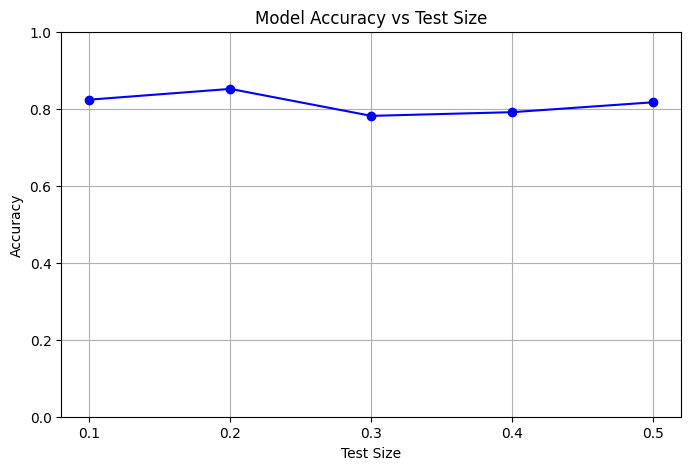

In [13]:
import pandas as pd
import numpy as np
import re
import string

# Load and preprocess the dataset
def preprocess_text(text):
    if isinstance(text, str):
        text = text.lower()
        text = re.sub(f"[{string.punctuation}]", "", text)
        return text
    return ""

# Load the dataset
df = pd.read_csv("review.csv")
df.columns = df.columns.str.strip().str.lower()

# Validate required columns
if "review" not in df.columns or "sentiment" not in df.columns:
    raise KeyError("Dataset must contain 'review' and 'sentiment' columns")

# Apply preprocessing
df["review"] = df["review"].apply(preprocess_text)
df["sentiment"] = df["sentiment"].map({"positive": 1, "negative": 0})
df = df.dropna()

# Now retry generating the accuracy graph
X = df["review"]
y = df["sentiment"]

# Define different test sizes to observe accuracy variation
test_sizes = [0.1, 0.2, 0.3, 0.4, 0.5]
accuracies = []

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

for test_size in test_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    
    vectorizer = TfidfVectorizer()
    X_train_tfidf = vectorizer.fit_transform(X_train)
    X_test_tfidf = vectorizer.transform(X_test)
    
    model = LogisticRegression()
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# Plotting the accuracy graph
plt.figure(figsize=(8, 5))
plt.plot(test_sizes, accuracies, marker='o', linestyle='-', color='b')
plt.title("Model Accuracy vs Test Size")
plt.xlabel("Test Size")
plt.ylabel("Accuracy")
plt.grid(True)
plt.xticks(test_sizes)
plt.ylim(0, 1)
plt.show()
